In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
%matplotlib inline
import random

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
#Obtain the list of the cities 
lat_lngs = []
city_number = 0
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    print(f"{city_number} {city}")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        city_number = city_number + 1 
        cities.append(city)
        

# Print the city count to confirm sufficient count
#Include a print log of each city as it's being processed with the city number and city name.


0 mouzakion
1 punta arenas
2 attawapiskat
3 butaritari
4 cabo san lucas
5 tasiilaq
6 goderich
7 hambantota
8 bluff
9 pisco
10 vaini
11 chokurdakh
12 east london
13 namibe
14 ribeira grande
15 albany
16 shagonar
17 east london
17 tuktoyaktuk
18 tasiilaq
18 bonthe
19 port elizabeth
20 thompson
21 punta arenas
21 cidreira
22 thabazimbi
23 na wa
24 evensk
25 nizhneyansk
26 waitati
27 hilo
28 ushuaia
29 nizhneyansk
29 jamestown
30 suileng
31 yomitan
32 albany
32 albany
32 port hawkesbury
33 hobart
34 tsihombe
35 port alfred
36 kapaa
37 katsuura
38 mvangue
39 butaritari
39 pevek
40 yarmouth
41 avarua
42 horodok
43 punta arenas
43 athabasca
44 husavik
45 mnogovershinnyy
46 trinidad
47 illoqqortoormiut
48 cidreira
48 sabha
49 arraial do cabo
50 chuy
51 bolungarvik
52 bima
53 port alfred
53 ushuaia
53 wuwei
54 rikitea
55 ewa beach
56 jacareacanga
57 barrow
58 port lincoln
59 lebu
60 narsaq
61 naze
62 codrington
63 luderitz
64 pacific grove
65 tasiilaq
65 nikolskoye
66 arraial do cabo
66 busselt

In [7]:
#pass the cities from cities list to the weather api 
place = []
lat = []
lng = []
temp_max = []
humidity = []
cloudiness = []
cloud_p = []
windspeed = []
country = []
date = []
 
#look through each city in the open weather api and extract the above information 
for city in cities: 
    url = "http://api.openweathermap.org/data/2.5/weather?appid=8c0d998c71e71a29cfdbcd454e53adea" + "&q=" + city
    city_weather = requests.get(url).json()
    try: 
        lng.append(city_weather['coord']['lon'])
        lat.append(city_weather['coord']['lat'])
        temp_max.append(city_weather['main']['temp_max'])
        humidity.append(city_weather['main']['humidity']) 
        cloudiness.append(city_weather['weather'][0]['description'])
        cloud_p.append(city_weather["clouds"]["all"])
        windspeed.append(city_weather['wind']['speed'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        place.append(city_weather['name'])
        print(city_weather['name'])
    except: 
        print("City not here")
        pass
    

City not here
Punta Arenas
City not here
Butaritari
Cabo San Lucas
Tasiilaq
Goderich
Hambantota
Bluff
Pisco
Vaini
Chokurdakh
East London
Mossamedes
Ribeira Grande
Albany
Shagonar
Tuktoyaktuk
Bonthe
Port Elizabeth
Thompson
Cidreira
Thabazimbi
Na Wa
Evensk
City not here
Waitati
Hilo
Ushuaia
Jamestown
Suileng
City not here
Port Hawkesbury
Hobart
City not here
Port Alfred
Kapaa
Katsuura
Mvangué
Pevek
Yarmouth
Avarua
Horodok
Athabasca
Husavik
Mnogovershinnyy
La Santisima Trinidad
City not here
Sabha
Arraial do Cabo
Chui
City not here
Bima
Wuwei
Rikitea
‘Ewa Beach
Jacareacanga
Barrow
Port Lincoln
Lebu
Narsaq
Naze
Codrington
Lüderitz
Pacific Grove
Nikolskoye
Busselton
Puerto Ayora
Vila do Maio
Kommunar
Ambikāpur
Castro
Cape Town
Cherskiy
Nabire
Bourail
City not here
City not here
Tessalit
City not here
Cayenne
Kailua
Clyde River
Boden
Vizinga
City not here
Pervomayskoye
Mina
Hithadhoo
Panama City
Bahía Honda
Koindu
Priyutnoye
Khandyga
Dunedin
Airai
Saint-Philippe
Antsohihy
Mataura
Vrede
Bethe

In [9]:
city_weather_data = {
                    'City': place,
                    'Latitude': lat,
                    'Longitude':lng,
                    'Max Temp (K)':temp_max,
                    'Humidity':humidity,
                    'Sky Description':cloudiness,
                    'Cloudiness %':cloud_p,
                    'Wind speed':windspeed,
                    'Country':country,
                    'Date':date,
                
}

In [10]:
df = pd.DataFrame(city_weather_data)
df.head(3)

,City,Latitude,Longitude,Max Temp (K),Humidity,Sky Description,Cloudiness %,Wind speed,Country,Date
0,Punta Arenas,-53.15,-70.92,285.15,50,broken clouds,75,12.90,CL,1601842583
1,Butaritari,3.07,172.79,299.71,77,overcast clouds,100,2.08,KI,1601842760
2,Cabo San Lucas,22.89,-109.91,306.48,55,clear sky,5,2.10,MX,1601842787


In [11]:
#Create a new column that calculates max temp in Fahrenheit 
f = []
for temp in df['Max Temp (K)']:
    x =(((9/5)*(temp - 273)) + 32)
    x = round(x,2)
    f.append(x)
df['Max Temp (F)'] = f
df


,City,Latitude,Longitude,Max Temp (K),Humidity,Sky Description,Cloudiness %,Wind speed,Country,Date,Max Temp (F)
0,Punta Arenas,-53.15,-70.92,285.15,50,broken clouds,75,12.90,CL,1601842583,53.87
1,Butaritari,3.07,172.79,299.71,77,overcast clouds,100,2.08,KI,1601842760,80.08
2,Cabo San Lucas,22.89,-109.91,306.48,55,clear sky,5,2.10,MX,1601842787,92.26
3,Tasiilaq,65.61,-37.64,270.87,81,broken clouds,59,1.34,GL,1601842797,28.17
4,Goderich,43.75,-81.72,285.93,51,overcast clouds,97,1.34,CA,1601842895,55.27
...,...,...,...,...,...,...,...,...,...,...,...
554,Kunashak,55.70,61.55,273.15,92,clear sky,10,2.00,RU,1601843050,32.27
555,Klyuchi,52.27,79.17,277.62,72,overcast clouds,100,4.80,RU,1601843050,40.32
556,Praia,14.92,-23.51,298.15,73,few clouds,20,5.10,CV,1601843050,77.27
557,Verkhoyansk,67.54,133.38,270.75,91,broken clouds,52,2.02,RU,1601842829,27.95


In [12]:
df.to_csv (output_data_file, index = False, header=True)

In [13]:
#create a new dataframe for the Northern Hemisphere 
#create a new dataframe for the Southern Hemisphere 
#To do this create a conditional that only includes latitude values of 0 to 90 for N; and vice versa for S
df_N_Hem = df[df['Latitude']>=0]
df_S_Hem = df[df['Latitude']<=0]

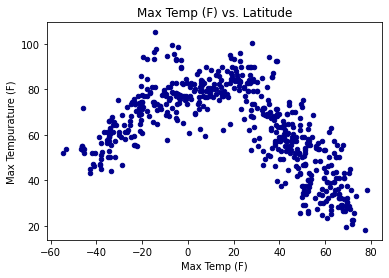

In [15]:
plotA = df.plot.scatter(x = 'Latitude',
                        y = 'Max Temp (F)',
                        c = 'DarkBlue')
plt.title("Max Temp (F) vs. Latitude")
plt.xlabel("Max Temp (F)")
plt.ylabel("Max Tempurature (F)")
plt.savefig('Max_Temp_v_Latitude.png')

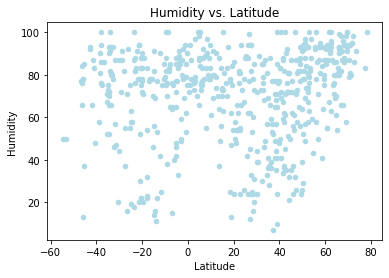

In [16]:
plotB = df.plot.scatter(x = 'Latitude',
                        y = 'Humidity',
                        c = 'LightBlue')
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('Humidity_v_Latitude.png')

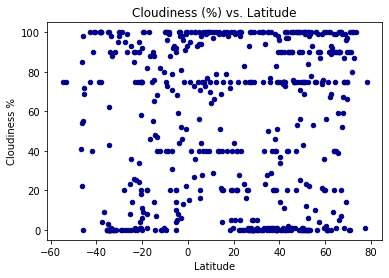

In [17]:
plotC = df.plot.scatter(x = 'Latitude',
                        y = 'Cloudiness %',
                        c = 'DarkBlue')
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig('Cloudiness_v_Latitude.png')

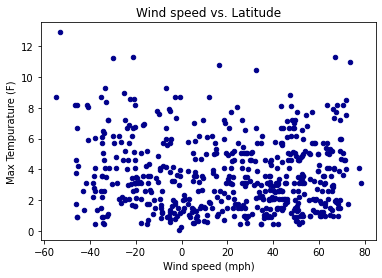

In [21]:
plotD = df.plot.scatter(x = 'Latitude',
                        y = 'Wind speed',
                        c = 'DarkBlue')
plt.title("Wind speed vs. Latitude")
plt.xlabel("Wind speed (mph)")
plt.ylabel("Max Tempurature (F)")
plt.savefig('Wind speed_v_Latitude.png')

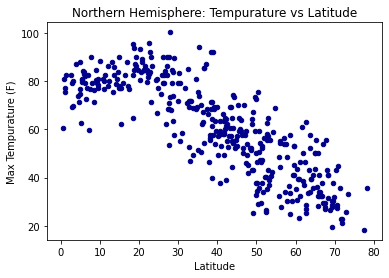

In [22]:
#Scatter Plot of Northern Hemisphere - Temperature (F) vs. Latitude
#Analysis: If you're in the Northern Hemispehre as you move north from the equator the tempurature drops. 
#The trend line in this scatterplot is a key proof point, showing that it gets hotter as you get closer to the equator. 
lat = np.arange(0, 90, 1)


plot1 = df_N_Hem.plot.scatter(x = 'Latitude',
                              y = 'Max Temp (F)',
                              c = 'DarkBlue')
plt.title("Northern Hemisphere: Tempurature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (F)")
plt.savefig('NH: Temp_v_Latitude.png')
# m, b = np.polyfit(x, y, 1)
# plt.plot(x, m*x + b)

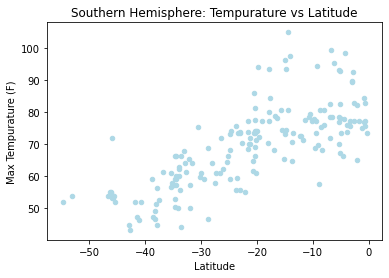

In [23]:
#Scatter Plot Southern Hemisphere Temp vs. Latitude
#Analysis: If you're in the Southern Hemispehre as you move from the Antartica to the equator it gets warmer. 
#The above statement is conveyed in the scatter plot below which trends upward as latitude moves toward 0. 
plot2 = df_S_Hem.plot.scatter(x = 'Latitude',
                              y = 'Max Temp (F)',
                              c = 'LightBlue')
plt.title("Southern Hemisphere: Tempurature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (F)")
plt.savefig('SH: Temp_v_Latitude.png')

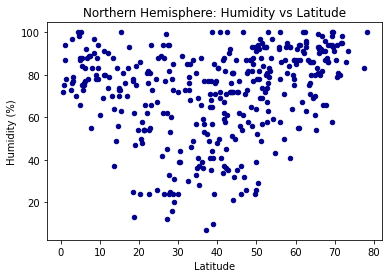

In [24]:
#Scatter Plot Northern Hemisphere - Humidity (%) vs. Latitude
#Analysis: There is not a very strong relationship between Humidity and proximity to the equator but generally it's more humid at 0 degrees latitude.
#The above point is evident in the mostly random smattering of data points conveying humdity levels vary randomoly compared against latitude. 
plot3 = df_N_Hem.plot.scatter(x = 'Latitude',
                              y = 'Humidity',
                              c = 'DarkBlue')
plt.title("Northern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('NH: Humidity_v_Latitude.png')

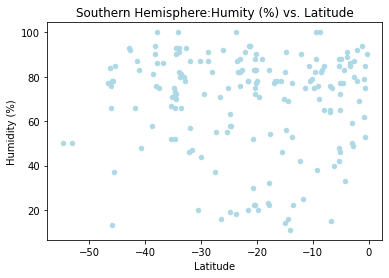

In [25]:
#Scatter Plot Southern Hemisphere - Humidity (%) vs. Latitude
#Analysis: In the Southern Hemisphere, humidity tends to be higher as you approach the equator. 
#This is conveyed by the cluster of dots in the top righthand corner of the scatter plot. 

plot4 = df_S_Hem.plot.scatter(x='Latitude',
                             y = 'Humidity',
                             c='LightBlue')
plt.title("Southern Hemisphere:Humity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('SH: Humidity_v_Latitude.png')

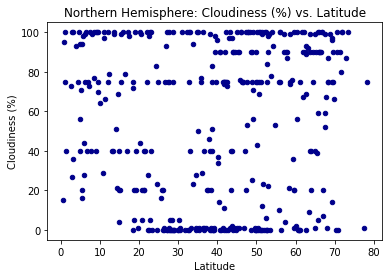

In [26]:
#Scatterplot of Northern Hemisphere - Cloudiness (%) vs. Latitude
#Analysis: Cloudiness is measured in 8ths of the sky hence the more banded scatter plot arragement. In general the sky tends to be either  
plot5 = df_N_Hem.plot.scatter(x="Latitude",
                             y="Cloudiness %",
                             c="DarkBlue")
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('NH: Cloudiness_v_Latitude.png')

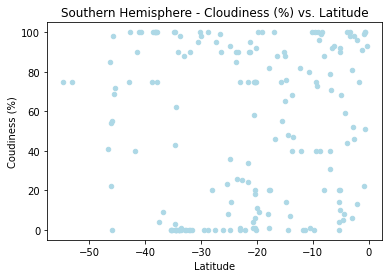

In [27]:
#Scatter plot of Southern Hemisphere - Cloudiness (%) vs. Latitude
plot6 = df_S_Hem.plot.scatter(x="Latitude",
                             y="Cloudiness %",
                             c="LightBlue")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Coudiness (%)")
plt.savefig('SH: Cloudiness_v_Latitude.png')

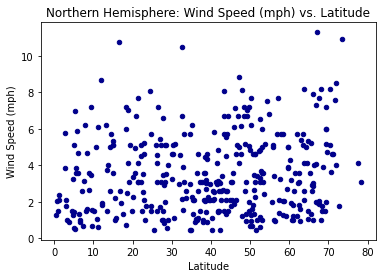

In [28]:
#Scatter Plot of Northern Hemisphere - Wind Speed (mph) vs. Latitude
plot7 = df_N_Hem.plot.scatter(x='Latitude',
                             y='Wind speed',
                             c= 'DarkBlue')
plt.title("Northern Hemisphere: Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('NH: Wind spped_v_Latitude.png')

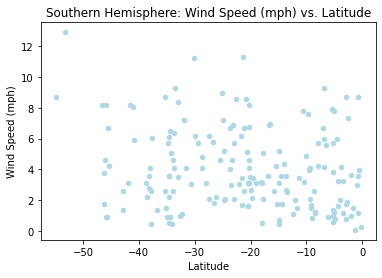

In [29]:
#Scatter Plot of Southern Hemisphere - Wind Speed (mph) vs. Latitude
plot8 = df_S_Hem.plot.scatter(x="Latitude",
                             y="Wind speed",
                             c="LightBlue")
plt.title("Southern Hemisphere: Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('SH: Wind Speed_v_Latitude.png')